<a href="https://www.kaggle.com/code/halfbloodhamed/rice-image-classification-cnn-tpu?scriptVersionId=207374137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:10px; padding: 30px; background-color: #c0e5e9; font-size:90%; text-align:left">
    <p style="font-family:Georgia; font-size:400%;font-weight:bold;text-align:center;color:navy;">
        🍚 Rice Image Classification 🌾
    </p>

<p style="font-family:'Times New Roman', Times, serif; font-size:300%;font-weight:bold;text-align:center;color:navy;">
        🧠 Comparing Custom and Pretrained Models 🖥️
    </p>

<p style="font-family:'Times New Roman', Times, serif; font-size:200%;font-weight:bold;text-align:center;color:navy;">
        Developed by: Hamed Mahmoudi 👨‍💻
    </p>
</div>

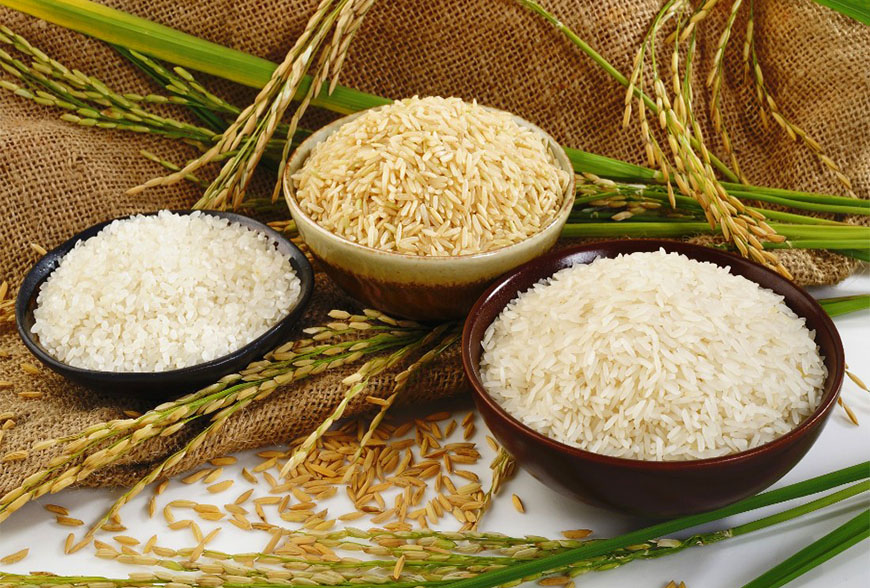

<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">
    <h3 align="left"><font color="navy">🍚 Rice Image Classification Project 🍚</font></h3>
    <p style="color:navy;">
        This project focuses on classifying different types of rice grains, including Arborio, Basmati, Jasmine, Ipsala, and Karacadag. 
        By leveraging both custom deep learning models and pretrained architectures (such as AlexNet, ResNet50, VGGNet19, and EfficientNetV2L), 
        we aim to determine the most effective approach for accurate rice variety classification.
        <br><br>
    </p>

</div>

<a id="c_table"></a> 



<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">



<h3 align="left"><font color=navy>Table of Contents:</font></h3>

<font color=navy>

        

* [1 | Libraries📚](#lib)
* [2 | Importing Dataset🗄](#data)
* [3 | Dataset Description📖](#datades)
* [4 | Visualizing📈](#Visualizing)
* [5 | Custom Models📊](#custom)
* [6 | AlexNet📊](#Alex)
* [7 | Result📊](#result)

<a id="lib"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">1 - Libraries 📚</p>



⬆️ [Table of Contents](#c_table)

In [ ]:
!pip install -q mplcyberpunk --upgrade

!pip install -q visualkeras --upgrade

!pip install -q silence_tensorflow --upgrade

In [ ]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf

from tensorflow import keras

from collections import Counter

import mplcyberpunk

import visualkeras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.applications import ResNet50, VGG19, EfficientNetV2L

import silence_tensorflow

import warnings



silence_tensorflow.silence_tensorflow()

warnings.filterwarnings('ignore')

<a id="data"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">2 - Importing Dataset🗄</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <font color=navy>
    <p style="color:navy;">
      In this section, we load the rice image dataset from the specified directory and split it into training and validation sets.
      As this project is for educational purposes, a separate test dataset is not created. Instead, the focus is on observing the model's
      performance during training and validation. The process involves the following steps:
    </p>
    <ul>
      <li>Using <strong>image_dataset_from_directory</strong> from TensorFlow Keras to load the images and infer labels automatically.</li>
      <li>Applying a 75-25 split ratio to create training and validation datasets.</li>
      <li>Resizing images to <strong>250x250</strong> pixels for uniformity across the dataset.</li>
      <li>Using a <strong>batch size</strong> of 64 for efficient training.</li>
      <li>Setting a random seed for <strong>reproducibility</strong> of results.</li>
    </ul>

  </font>

</div>


In [ ]:
# Load the dataset from the directory

train = keras.utils.image_dataset_from_directory(

    directory = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/',

    labels = 'inferred',

    label_mode = 'categorical',

    image_size = (250, 250),

    shuffle = True,

    validation_split = 0.25,

    subset = 'training',

    batch_size = 64,

    seed = 42

)



validation = keras.utils.image_dataset_from_directory(

    directory = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/',

    labels = 'inferred',

    label_mode = 'categorical',

    image_size = (250, 250),

    shuffle = True,

    validation_split = 0.25,

    subset = 'validation',

    batch_size = 64,

    seed = 42

)

<a id="datades"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">3 - Dataset Description📖</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <font color=navy>
    <p style="color:navy;">
      In this step, we analyze the distribution of samples across different categories in the training and validation datasets. 
      This helps us understand the class balance before proceeding with model training. The analysis involves the following steps:
    </p>
    <ul>
      <li>Initializing a <strong>counter</strong> to track the number of samples for each class in both training and validation sets.</li>
      <li>Iterating through the dataset batches and converting the <strong>one-hot encoded labels</strong> back to class indices.</li>
      <li>Counting and printing the number of samples for each rice variety (category) in the training and validation datasets.</li>
      <li>Calculating the <strong>total count</strong> of samples across both datasets to check overall class distribution.</li>
      <li>Displaying the shape of a batch of images and labels to verify the data structure and inspect sample values.</li>
    </ul>

  </font>

</div>


In [ ]:
# Initialize a counter to keep track of the labels

train_label_counts = Counter()



# Loop through the batches in the dataset

for images, labels in train:

    # Convert the one-hot encoded labels back to the class indices

    class_indices = np.argmax(labels, axis=1)

    train_label_counts.update(class_indices)



# Print the count for each category

for label, count in train_label_counts.items():

    print(f"Category {train.class_names[label]} in training : {count} samples")

In [ ]:
# Initialize a counter to keep track of the labels

validation_label_counts = Counter()



# Loop through the batches in the dataset

for images, labels in validation:

    # Convert the one-hot encoded labels back to the class indices

    class_indices = np.argmax(labels, axis=1)

    validation_label_counts.update(class_indices)



# Print the count for each category

for label, count in validation_label_counts.items():

    print(f"Category {train.class_names[label]} in validation : {count} samples")

In [ ]:
total_counts = train_label_counts + validation_label_counts

print('Total count of categories : ', total_counts)

In [ ]:
for images, labels in train.take(1):

    print("Batch shape:", images.shape)

    print("Label shape:", labels.shape)

    print("Label sample (one-hot encoded):", labels[0])

In [ ]:
tf.reduce_max(images[1]).numpy()

<a id="Visualizing"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">4 - Visualizing📈</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <font color=navy>
    <p style="color:navy;">
      To gain a better understanding of the dataset's distribution, we visualize the sample counts for each rice variety along with representative images. 
      This helps in identifying any class imbalances and provides a visual overview of the dataset.
    </p>

  </font>

</div>


In [ ]:
# Define custom colors

custom_colors = ['#d62828', '#fb8500', '#06d6a0', '#023047', '#4361ee']



# Plot the bar plot and sample images in one chart

plt.figure(figsize=(15, 12))



# Plot the histogram

plt.subplot(2, 1, 1)

bars = plt.bar(train_label_counts.keys(), train_label_counts.values(), color=custom_colors)

mplcyberpunk.add_bar_gradient(bars=bars)



# Annotate each bar with its count

for i, bar in enumerate(bars):

    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, 

             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)



# Labeling the x-axis with class names

plt.xticks(ticks=list(train_label_counts.keys()), labels=[train.class_names[i] for i in train_label_counts.keys()])

plt.ylabel('Count')

plt.title('Distribution of training Labels')



# Plot sample images from each label

num_classes = len(train.class_names)

for k, label in enumerate(train_label_counts.keys()):

    plt.subplot(2, num_classes, num_classes + k + 1)



    # Extract a sample image for this class label

    found = False

    for images, labels in train:

        for j in range(len(labels)):

            if np.argmax(labels[j]) == label:

                plt.imshow(images[j].numpy().astype('uint8'))

                plt.title(train.class_names[label], color=custom_colors[k])

                plt.axis('off')

                found = True

                break

        if found:

            break



plt.tight_layout()

plt.show()

In [ ]:
# Define custom colors

custom_colors = ['#d62828', '#fb8500', '#06d6a0', '#023047', '#4361ee']



# Plot the bar plot and sample images in one chart

plt.figure(figsize=(15, 12))



# Plot the histogram

plt.subplot(2, 1, 1)

bars = plt.bar(validation_label_counts.keys(), validation_label_counts.values(), color=custom_colors)

mplcyberpunk.add_bar_gradient(bars=bars)



# Annotate each bar with its count

for i, bar in enumerate(bars):

    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, 

             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)



# Labeling the x-axis with class names

plt.xticks(ticks=list(validation_label_counts.keys()), labels=[train.class_names[i] for i in validation_label_counts.keys()])

plt.ylabel('Count')

plt.title('Distribution of validation Labels')



# Plot sample images from each label

num_classes = len(train.class_names)

for k, label in enumerate(validation_label_counts.keys()):

    plt.subplot(2, num_classes, num_classes + k + 1)



    # Extract a sample image for this class label

    found = False

    for images, labels in train:

        for j in range(len(labels)):

            if np.argmax(labels[j]) == label:

                plt.imshow(images[j].numpy().astype('uint8'))

                plt.title(train.class_names[label], color=custom_colors[k])

                plt.axis('off')

                found = True

                break

        if found:

            break



plt.tight_layout()

plt.show()

In [ ]:
# Define custom colors

custom_colors = ['#d62828', '#fb8500', '#06d6a0', '#023047', '#4361ee']



# Plot the bar plot and sample images in one chart

plt.figure(figsize=(15, 12))



# Plot the histogram

plt.subplot(2, 1, 1)

bars = plt.bar(total_counts.keys(), total_counts.values(), color=custom_colors)

mplcyberpunk.add_bar_gradient(bars=bars)



# Annotate each bar with its count

for i, bar in enumerate(bars):

    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, 

             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)



# Labeling the x-axis with class names

plt.xticks(ticks=list(total_counts.keys()), labels=[train.class_names[i] for i in total_counts.keys()])

plt.ylabel('Count')

plt.title('Distribution of dataset Labels')



# Plot sample images from each label

num_classes = len(train.class_names)

for k, label in enumerate(total_counts.keys()):

    plt.subplot(2, num_classes, num_classes + k + 1)



    # Extract a sample image for this class label

    found = False

    for images, labels in train:

        for j in range(len(labels)):

            if np.argmax(labels[j]) == label:

                plt.imshow(images[j].numpy().astype('uint8'))

                plt.title(train.class_names[label], color=custom_colors[k])

                plt.axis('off')

                found = True

                break

        if found:

            break



plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(15, len(train.class_names) * 3))



for class_index, class_name in enumerate(train.class_names):

    count = 0

    for images, labels in train:

        for i in range(len(labels)):

            if tf.argmax(labels[i]).numpy() == class_index:

                if count == 0:

                    plt.subplot(len(train.class_names), 6, class_index * 6 + 1)

                    plt.text(0.5, 0.5, class_name, ha='center', va='center', fontsize=20)

                    plt.axis("off")



                plt.subplot(len(train.class_names), 6, class_index * 6 + count + 2)

                plt.imshow(images[i].numpy().astype("uint8"))

                plt.axis("off")

                

                count += 1

                if count == 5:

                    break

        if count == 5:

            break



plt.tight_layout()

plt.show()

<a id="custom"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">5 - Custom Models📊</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

  <font color=navy>
    <p style="color:navy;">
      We define three custom convolutional neural network (CNN) models with increasing complexity to classify rice images into five distinct varieties. 
      Each model follows a sequential architecture and includes the following components:
    </p>
    <ul>
      <li><strong>Model 1:</strong> A simple architecture with a single convolutional layer (64 filters), followed by max pooling, flattening, and two dense layers. This lightweight model serves as a baseline.</li>
      <li><strong>Model 2:</strong> An enhanced version with an additional convolutional layer (128 and 64 filters). This deeper architecture aims to capture more complex patterns in the images.</li>
      <li><strong>Model 3:</strong> The most advanced model, incorporating batch normalization for improved training stability. It includes two convolutional layers (128 and 64 filters) and an increased number of dense units to enhance feature extraction capabilities.</li>
    </ul>
    <p style="color:navy;">
      All models use ReLU activation for hidden layers and softmax activation for the output layer to handle multi-class classification. The input images are rescaled to normalize pixel values between 0 and 1, aiding in faster convergence during training.
    </p>

  </font>

</div>


In [ ]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

# instantiate a distribution strategy
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

print("Number of accelerators:", tpu_strategy.num_replicas_in_sync)

In [ ]:
# Model parameters

num_classes = 5

input_shape = (250, 250, 3)


# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    model = keras.Sequential(

    [

        keras.layers.Input(shape=input_shape),

        keras.layers.Rescaling(1./255),

        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        keras.layers.Flatten(),

        keras.layers.Dense(units = 32, activation = 'relu'),

        keras.layers.Dense(num_classes, activation="softmax"),

    ]

    )
    model.compile(

    loss=keras.losses.CategoricalCrossentropy(),

    optimizer=keras.optimizers.Adam(learning_rate=1e-3),

    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]

    )

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(

    model,

    show_shapes=True,

    show_dtype=False,

    show_layer_names=False,

    show_layer_activations=True,

    dpi=100

)

In [ ]:
visualkeras.layered_view(

    model,

    draw_volume=True,

    scale_xy=1.2,

    scale_z=0.8,

    spacing=60,

    padding=50

)

In [ ]:
# train model normally
model.fit(

    train,

    validation_data=validation,

    batch_size=64,

    epochs=15,
    
    verbose=0

)

In [ ]:
# Retrieve training history

history_of_model_1 = model.history.history

In [ ]:
def accuracy_plot(history):

    # Set Seaborn theme once

    sns.set_theme(style='darkgrid')



    # Create a DataFrame for accuracy (using NumPy for efficient range generation)

    epochs = np.arange(1, len(history['accuracy']) + 1)

    accuracy_data = pd.DataFrame({

        'Epoch': np.tile(epochs, 2),

        'Accuracy': history['accuracy'] + history['val_accuracy'],

        'Type': ['Training Accuracy'] * len(history['accuracy']) + ['Validation Accuracy'] * len(history['val_accuracy'])

    })



    # Plot Accuracy

    plt.figure(figsize=(15, 8))

    sns.lineplot(x='Epoch', y='Accuracy', hue='Type', style='Type', markers=True, data=accuracy_data)

    plt.title('Model Accuracy')

    plt.xlabel('Epoch')

    plt.ylabel('Accuracy')

    plt.legend(title='')

    plt.grid(True)

    plt.show()

In [ ]:
accuracy_plot(history_of_model_1)

In [ ]:
def loss_plot(history):

    # Set Seaborn theme once

    sns.set_theme(style='darkgrid')



    # Create a DataFrame for loss (using NumPy for efficient range generation)

    epochs = np.arange(1, len(history['loss']) + 1)

    loss_data = pd.DataFrame({

        'Epoch': np.tile(epochs, 2),

        'Loss': history['loss'] + history['val_loss'],

        'Type': ['Training Loss'] * len(history['loss']) + ['Validation Loss'] * len(history['val_loss'])

    })



    # Plot Loss

    plt.figure(figsize=(15, 8))

    sns.lineplot(x='Epoch', y='Loss', hue='Type', style='Type', markers=True, data=loss_data)

    plt.title('Model Loss')

    plt.xlabel('Epoch')

    plt.ylabel('Loss')

    plt.legend(title='')

    plt.grid(True)

    plt.show()

In [ ]:
loss_plot(history_of_model_1)

In [ ]:
metrics_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_Score"])

def evaluate_model(model, model_name, validation_data, metrics_df, strategy):

    # Initialize the arrays to store true and predicted labels
    all_true_labels = []
    all_predicted_labels = []

    # Iterate over the validation dataset in batches
    for images, labels in validation_data:
        
        # Extract true labels (convert one-hot encoding to class indices)
        true_labels = np.argmax(labels.numpy(), axis=1)
        all_true_labels.append(true_labels)

        # Perform predictions directly using the model within the strategy scope
        with strategy.scope():
            predicted_logits = model(images, training=False)
            predicted_classes = np.argmax(predicted_logits.numpy(), axis=1)
        
        all_predicted_labels.append(predicted_classes)

    # Convert lists of true and predicted labels to NumPy arrays
    y_true = np.concatenate(all_true_labels, axis=0)
    y_pred = np.concatenate(all_predicted_labels, axis=0)

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    # Store metrics in the DataFrame
    metrics_df.loc[model_name] = [accuracy, precision, recall, f1]

    # Display the metrics DataFrame
    print(f"\nMetrics :")
    display(metrics_df)

    # Compute and plot the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=validation_data.class_names,
                yticklabels=validation_data.class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    return metrics_df

# Use the evaluate_model function
metrics_df = evaluate_model(model, "Custom Model 1", validation, metrics_df, tpu_strategy)

In [ ]:
# Get a batch of validation data
x_batch, y_batch = next(iter(validation))

# Make predictions within TPU strategy scope
with tpu_strategy.scope():
    y_pred_batch = model(x_batch, training=False)

# Convert predictions to label indices
y_pred_labels = np.argmax(y_pred_batch.numpy(), axis=1)
y_true_labels = np.argmax(y_batch.numpy(), axis=1)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i].numpy().astype("uint8"))
    
    true_label = validation.class_names[y_true_labels[i]]
    pred_label = validation.class_names[y_pred_labels[i]]
    
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

  <font color=navy>
    <p style="color:navy;">
      The first custom model shows promising performance with high training and validation accuracy, especially in the initial epochs. 
      Here are some key observations:
    </p>
    <ul>
      <li><strong>High Initial Accuracy:</strong> The model quickly achieves over 90% training accuracy in the first epoch and reaches nearly 99.95% by the 15th epoch, indicating effective learning of patterns in the data.</li>
      <li><strong>Validation Accuracy:</strong> The validation accuracy also remains high, stabilizing around 98-99%. This suggests that the model generalizes well to unseen data, though there is a slight decline in the final epochs.</li>
      <li><strong>Loss Analysis:</strong> While the training loss decreases consistently, the validation loss begins to increase after the 5th epoch. This divergence between training and validation loss is a sign of potential overfitting.</li>
      <li><strong>Overfitting:</strong> Given the increasing validation loss despite high accuracy, the model may be memorizing the training data rather than learning general features. Techniques like regularization, dropout, or early stopping could help mitigate this issue.</li>
    </ul>
    <p style="color:navy;">
      Overall, the model performs well but shows signs of overfitting as training progresses, indicating the need for optimization in future iterations.
    </p>

  </font>

</div>


In [ ]:
# Model parameters

num_classes = 5

input_shape = (250, 250, 3)


with tpu_strategy.scope():
    model2 = keras.Sequential(

        [

            keras.layers.Input(shape=input_shape),

            keras.layers.Rescaling(1./255),

            keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),

            keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
            keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            keras.layers.Flatten(),

            keras.layers.Dense(units = 32, activation = 'relu'),

            keras.layers.Dense(num_classes, activation="softmax"),

        ]

    )
    model2.compile(

    loss=keras.losses.CategoricalCrossentropy(),

    optimizer=keras.optimizers.Adam(learning_rate=1e-3),

    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]

    )

In [ ]:
model2.summary()

In [ ]:
tf.keras.utils.plot_model(

    model2,

    show_shapes=True,

    show_dtype=False,

    show_layer_names=False,

    show_layer_activations=True,

    dpi=100

)

In [ ]:
visualkeras.layered_view(

    model2,

    draw_volume=True,

    scale_xy=1.2,

    scale_z=0.8,

    spacing=60,

    padding=50

)

In [ ]:
model2.fit(

    train,

    validation_data=validation,

    batch_size=64,

    epochs=15,
    
    verbose=0

)

In [ ]:
history_of_model_2 = model2.history.history

In [ ]:
accuracy_plot(history_of_model_2)

In [ ]:
loss_plot(history_of_model_2)

In [ ]:
metrics_df = evaluate_model(model2, "Custom Model 2", validation, metrics_df, tpu_strategy)

In [ ]:
# Get a batch of validation data
x_batch, y_batch = next(iter(validation))

# Make predictions within TPU strategy scope
with tpu_strategy.scope():
    y_pred_batch = model2(x_batch, training=False)

# Convert predictions to label indices
y_pred_labels = np.argmax(y_pred_batch.numpy(), axis=1)
y_true_labels = np.argmax(y_batch.numpy(), axis=1)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i].numpy().astype("uint8"))
    
    true_label = validation.class_names[y_true_labels[i]]
    pred_label = validation.class_names[y_pred_labels[i]]
    
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

  <font color=navy>
    <p style="color:navy;">
      The second custom model shows significant improvement in terms of both accuracy and generalization, but some challenges remain. Here are the key takeaways:
    </p>
    <ul>
      <li><strong>Improved Performance:</strong> The model starts with a higher training accuracy of 91.4% in the first epoch and rapidly improves, reaching over 99.88% by the final epoch. This indicates that the additional convolutional layer helps capture more complex features from the data.</li>
      <li><strong>High Validation Accuracy:</strong> The validation accuracy remains consistently high, fluctuating around 98-99%, and peaks at 99.31%, demonstrating strong generalization to the validation set.</li>
      <li><strong>Validation Loss Fluctuation:</strong> The validation loss decreases initially but shows slight fluctuations across epochs, with the lowest being 0.0280. The increase in validation loss, especially after epoch 8, may suggest mild overfitting as the model starts to learn the noise in the training data.</li>
      <li><strong>Overfitting Signs:</strong> Although the model achieves impressive accuracy, the slight rise in validation loss compared to the relatively low training loss points towards minor overfitting. This could be addressed by incorporating techniques like dropout or adding regularization.</li>
    </ul>
    <p style="color:navy;">
      Overall, this model outperforms the first one by learning more robust features, but further optimization could help mitigate overfitting and improve generalization even more.
    </p>

  </font>

</div>


In [ ]:
# Model parameters

num_classes = 5

input_shape = (250, 250, 3)


with tpu_strategy.scope():
    model3 = keras.Sequential(
    
        [
    
            keras.layers.Input(shape=input_shape),
    
            keras.layers.Rescaling(1./255),
    
            keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
            keras.layers.BatchNormalization(),
    
            keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
            keras.layers.Flatten(),
    
            keras.layers.Dense(units = 128, activation = 'relu'),
    
            keras.layers.Dense(units = 32, activation = 'relu'),
    
            keras.layers.Dense(num_classes, activation="softmax"),
    
        ]
    
    )
    model3.compile(

    loss=keras.losses.CategoricalCrossentropy(),

    optimizer=keras.optimizers.Adam(learning_rate=1e-3),

    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]

    )

In [ ]:
model3.summary()

In [ ]:
tf.keras.utils.plot_model(

    model3,

    show_shapes=True,

    show_dtype=False,

    show_layer_names=False,

    show_layer_activations=True,

    dpi=100

)

In [ ]:
visualkeras.layered_view(

    model3,

    draw_volume=True,

    scale_xy=1.2,

    scale_z=0.8,

    spacing=60,

    padding=50

)

In [ ]:
model3.fit(

    train,

    validation_data=validation,

    batch_size=64,

    epochs=15,
    
    verbose=0

)

In [ ]:
history_of_model_3 = model3.history.history

In [ ]:
accuracy_plot(history_of_model_3)

In [ ]:
loss_plot(history_of_model_3)

In [ ]:
metrics_df = evaluate_model(model3, "Custom Model 3", validation, metrics_df, tpu_strategy)

In [ ]:
# Get a batch of validation data
x_batch, y_batch = next(iter(validation))

# Make predictions within TPU strategy scope
with tpu_strategy.scope():
    y_pred_batch = model3(x_batch, training=False)

# Convert predictions to label indices
y_pred_labels = np.argmax(y_pred_batch.numpy(), axis=1)
y_true_labels = np.argmax(y_batch.numpy(), axis=1)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i].numpy().astype("uint8"))
    
    true_label = validation.class_names[y_true_labels[i]]
    pred_label = validation.class_names[y_pred_labels[i]]
    
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<a id="Alex"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">6 - AlexNet📊</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

  <font color=navy>
    <p style="color:navy;">AlexNet is a deep convolutional neural network that was designed for image classification tasks. It consists of five convolutional layers followed by three fully connected layers. The network utilizes ReLU activation functions, max-pooling, and local response normalization layers. It also includes a softmax output layer for multi-class classification. The architecture is known for its use of large convolutional filters and its application in the ImageNet competition, where it significantly reduced the error rate.</p>
  </font>

</div>


In [ ]:
# Model parameters

num_classes = 5

input_shape = (250, 250, 3)


with tpu_strategy.scope():
    AlexNet = keras.Sequential(
    
        [
    
            keras.layers.Input(shape=input_shape),
    
            keras.layers.Rescaling(1./255),
    
            keras.layers.Conv2D(96, kernel_size=(11,11), strides= 4,
    
                            padding= 'valid', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
    
                                  padding= 'valid', data_format= None),
    
            keras.layers.Conv2D(256, kernel_size=(5,5), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
    
                                  padding= 'valid', data_format= None),
    
            keras.layers.Conv2D(384, kernel_size=(3,3), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.Conv2D(384, kernel_size=(3,3), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.Conv2D(256, kernel_size=(5,5), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.Conv2D(256, kernel_size=(3,3), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
    
                                  padding= 'valid', data_format= None),
    
            keras.layers.Flatten(),
    
            keras.layers.Dense(units = 4096, activation = 'relu'),
    
            keras.layers.Dense(units = 4096, activation = 'relu'),
    
            keras.layers.Dense(units = 1000, activation = 'relu'),
    
            keras.layers.Dense(num_classes, activation="softmax"),
    
        ]
    
    )
    AlexNet.compile(

    loss=keras.losses.CategoricalCrossentropy(),

    optimizer=keras.optimizers.Adam(learning_rate=1e-3),

    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]

)

In [ ]:
AlexNet.summary()

In [ ]:
tf.keras.utils.plot_model(

    AlexNet,

    show_shapes=True,

    show_dtype=False,

    show_layer_names=False,

    show_layer_activations=True,

    dpi=100

)

In [ ]:
visualkeras.layered_view(

    AlexNet,

    draw_volume=True,

    scale_xy=1.2,

    scale_z=0.8,

    spacing=60,

    padding=50

)

In [ ]:
AlexNet.fit(

    train,

    validation_data=validation,

    batch_size=64,

    epochs=15,
    
    verbose=0

)

In [ ]:
history_of_AlexNet = AlexNet.history.history

In [ ]:
accuracy_plot(history_of_AlexNet)

In [ ]:
loss_plot(history_of_AlexNet)

In [ ]:
metrics_df = evaluate_model(AlexNet, "AlexNet", validation, metrics_df, tpu_strategy)

In [ ]:
# Get a batch of validation data
x_batch, y_batch = next(iter(validation))

# Make predictions within TPU strategy scope
with tpu_strategy.scope():
    y_pred_batch = AlexNet(x_batch, training=False)

# Convert predictions to label indices
y_pred_labels = np.argmax(y_pred_batch.numpy(), axis=1)
y_true_labels = np.argmax(y_batch.numpy(), axis=1)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i].numpy().astype("uint8"))
    
    true_label = validation.class_names[y_true_labels[i]]
    pred_label = validation.class_names[y_pred_labels[i]]
    
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<a id="result"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">7 - Result📊</p>



⬆️ [Table of Contents](#c_table)

In [ ]:
# Define model histories

histories = {

    "AlexNet": history_of_AlexNet,

    "Custom Model 3": history_of_model_3,

    "Custom Model 2": history_of_model_2,

    "Custom Model 1": history_of_model_1,

}



# Plot Accuracy

plt.figure(figsize=(15, 8))

for model_name, history in histories.items():

    plt.plot(history['accuracy'], label=f"{model_name} Training Accuracy")

    

plt.title('Training Accuracy Comparison')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend(loc="lower right")

plt.grid(True)

plt.show()

In [ ]:
# Plot Accuracy

plt.figure(figsize=(15, 8))

for model_name, history in histories.items():

    plt.plot(history['val_accuracy'], linestyle='--', label=f"{model_name} Validation Accuracy")

    

plt.title('Validation Accuracy Comparison')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend(loc="lower right")

plt.grid(True)

plt.show()

In [ ]:
# Plot Loss

plt.figure(figsize=(15, 8))

for model_name, history in histories.items():

    plt.plot(history['loss'], label=f"{model_name} Training Loss")

     

plt.title('Training Loss Comparison')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(loc="upper right")

plt.grid(True)

plt.show()

In [ ]:
# Plot Loss

plt.figure(figsize=(15, 8))

for model_name, history in histories.items():

    plt.plot(history['val_loss'], linestyle='--', label=f"{model_name} Validation Loss")

    

    

plt.title('Validation Loss Comparison')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(loc="upper right")

plt.grid(True)

plt.show()